In [1]:
import sys
sys.path.append('..')

In [2]:
%matplotlib inline

import math as m
import numpy as np
import scipy.signal as signal

import matplotlib
import matplotlib.pyplot as plt

from core import Core

from global_var import COLORS


In [3]:
matplotlib.rc('font', family='serif') 
matplotlib.rc('font', serif='Palatino Linotype') 
matplotlib.rc('text', usetex='false') 
matplotlib.rcParams.update({'font.size': 20})

In [4]:
well = 32700
average = 10
bit_depth = 2**12

In [5]:
# folder = r'D:\SPRUP_data_Jenda\21_04_15_DG600A1/'.replace('\\', '/')
# folder = r'D:\SPRUP_data_Jenda\21_04_14_DG600A1/'.replace('\\', '/')
folder = r'D:\SPRUP_data_Jenda\20_12_08_L3/'.replace('\\', '/')


# folder = r'D:\SPRUP_data_Jenda\21_04_14_DG750A1/'.replace('\\', '/')
# folder = r'D:\SPRUP_data_Jenda\21_03_06_BC5/'.replace('\\', '/')


file = 'raw_01_'

# folder = r'C:\SPRUP_data_Jenda\2019_03_13_Jenda_microscopy\20_03_16_K5/'.replace('\\', '/')
# file = 'raw_02_'

core = []
for i in [2]:
    c = Core(folder, file+str(i))
    c.k = 10
    core.append(c)

core 2: SPR file not found. Diseable ploting of SPR. 


In [6]:
c = core[0]
c.type = 'diff'

In [7]:
i_electrons = []
i_electrons_std = []

for i in range(20, len(c)):
# for i in range(20, len(c)):
    i_electrons.append(np.sum(c.frame(i)/c.area*well))
    i_electrons_std.append(np.std(c.frame(i)/c.area*well))
    
i_electrons = np.array(i_electrons)
i_electrons_std = np.array(i_electrons_std)




corr= np.correlate((
    i_electrons - i_electrons.mean())/i_electrons.sum(), 
    (i_electrons_std - i_electrons_std.mean())/i_electrons_std.sum(), 
    mode = 'full')

# correlation = signal.correlate(i_electrons, i_electrons_std, mode = 'full')

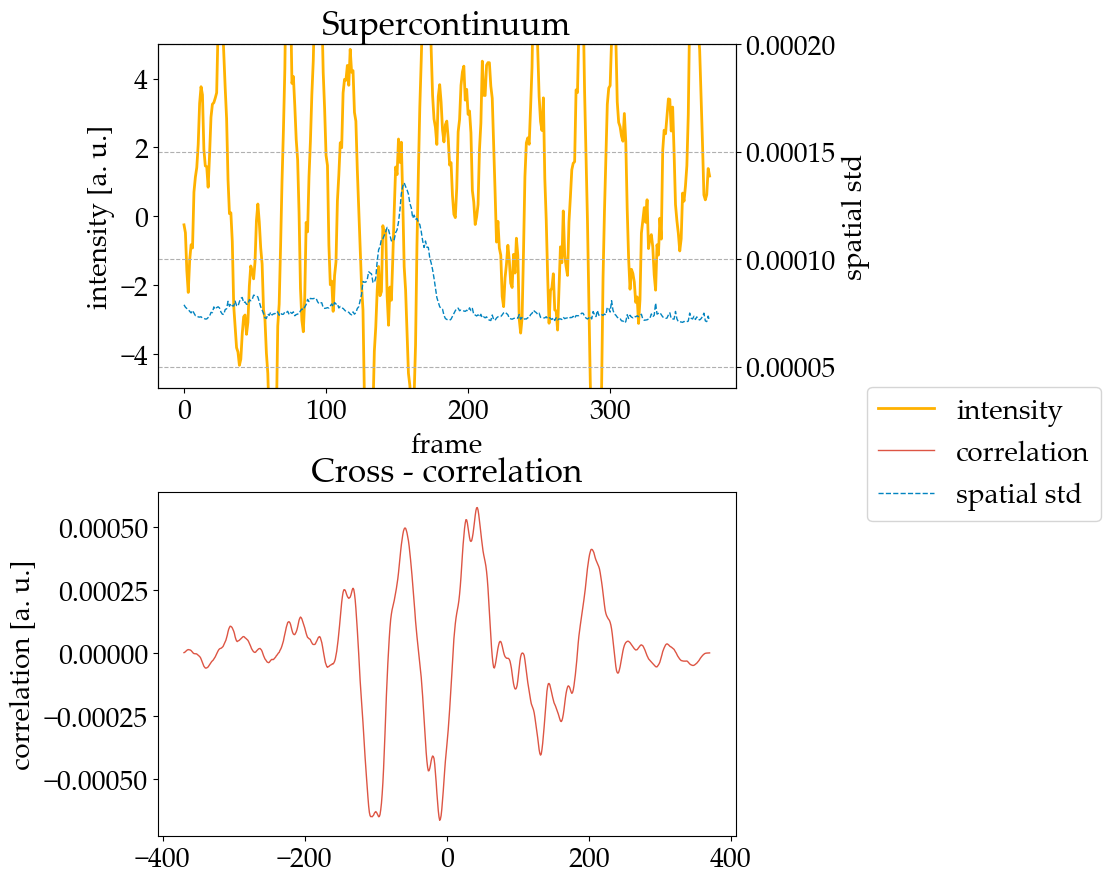

In [9]:
fig, axes_both = plt.subplots(2, 1, figsize=(7, 9), dpi=100)
fig.tight_layout(h_pad=2)

axes = axes_both[0]
axes = axes_both[0]
axes_corr = axes_both[1]

axes.set_title('Supercontinuum')
axes.set_xlabel('frame')
axes.set_ylabel('intensity [a. u.]')
axes.set_ylim([-5, 5])


axes_rel = axes.twinx()
axes_rel.grid(linestyle='--')
axes_rel.set_ylabel('spatial std')
axes_rel.set_ylim([4e-5, 2e-4])

axes.plot(i_electrons, linewidth=2, label = 'intensity', color = COLORS[0])



axes_rel.plot(i_electrons_std, linewidth=1, label = 'spatial std', ls = '--', color = COLORS[1])


axes_corr.set_title('Cross - correlation')
axes_corr.set_ylabel('frame shift')
axes_corr.set_ylabel('correlation [a. u.]')

axes_corr.plot(np.arange(-len(i_electrons)+1, len(i_electrons)), corr, linewidth=1, label = 'correlation', color = COLORS[2])

lgd = fig.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))

# fig.savefig('images/fluctuations_dg750A.png', dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')    
# fig.savefig('images/fluctuations_dg600A.png', dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')   
# fig.savefig('images/fluctuations_dg600A_01.png', dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')   
# fig.savefig('images/fluctuations_L3.png', dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')   

# fig.savefig('images/fluctuations_BC5.png', dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')    



In [ ]:
c = core[0]
c.type = 'raw'

i_electrons = []
i_electrons_std = []

for i in range(20, len(c)):
# for i in range(20, len(c)):
    i_electrons.append(np.sum(c.frame(i)/c.area*well))
    i_electrons_std.append(np.std(c.frame(i)/c.area*well))
    
i_electrons = np.array(i_electrons)
i_electrons_std = np.array(i_electrons_std)




corr= np.correlate((
    i_electrons - i_electrons.mean())/i_electrons.sum(), 
    (i_electrons_std - i_electrons_std.mean())/i_electrons_std.sum(), 
    mode = 'full')

# correlation = signal.correlate(i_electrons, i_electrons_std, mode = 'full')